In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline.zip to airline.zip


In [ ]:
!unzip airline.zip -d /content/data/

Archive:  airline.zip
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [ ]:
!ls /content/data/

test.csv  train.csv


### **Read the Dataset**

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/data/train.csv')
test = pd.read_csv('/content/data/test.csv')

### **Train Dataset Understanding**

In [ ]:
# Read dataset
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Data shape
print(train.shape)

(103904, 25)


In [ ]:
# Drop unecessary columns
train.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
# Replace satisfied = 1 | neutral or dissatisfied = 0
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

/tmp/ipython-input-8-1030074730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
/tmp/ipython-input-8-1030074730.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['satisfaction'].replace({'neutral

In [ ]:
# Train Dataset Description
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
# Features Summary

features_summary = []
duplicated_values = train.duplicated().sum()

for column in train.columns:
  if train[column].dtype == 'object':
    feature_type = 'Categorical'
    values = train[column].unique()

  else:
    feature_type = 'Numerical'
    values = f"{train[column].min()} to {train[column].max()}"

  missing_values = train[column].isnull().sum()
  features_summary.append([column, feature_type, values, missing_values])

features_table = pd.DataFrame(features_summary, columns=['Feature', 'Type', 'Values', 'Missing Values'])

print(features_table)
print("Duplicated Values:", duplicated_values)

                              Feature         Type  \
0                              Gender  Categorical   
1                       Customer Type  Categorical   
2                                 Age    Numerical   
3                      Type of Travel  Categorical   
4                               Class  Categorical   
5                     Flight Distance    Numerical   
6               Inflight wifi service    Numerical   
7   Departure/Arrival time convenient    Numerical   
8              Ease of Online booking    Numerical   
9                       Gate location    Numerical   
10                     Food and drink    Numerical   
11                    Online boarding    Numerical   
12                       Seat comfort    Numerical   
13             Inflight entertainment    Numerical   
14                   On-board service    Numerical   
15                   Leg room service    Numerical   
16                   Baggage handling    Numerical   
17                    Checki

In [ ]:
# Detecting Outliers (only numerical variables)

outliers_summary = []
numerical_columns = ['Age', 'Flight Distance','Arrival Delay in Minutes', 'Departure Delay in Minutes']
for column in numerical_columns:
  if column in train.columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((train[column] < lower_bound) | (train[column] > upper_bound)).sum()
    outliers_summary.append([column, outliers])

outliers_table = pd.DataFrame(outliers_summary, columns=['Feature', 'Outliers Count'])
print(outliers_table)

                      Feature  Outliers Count
0                         Age               0
1             Flight Distance            2291
2    Arrival Delay in Minutes           13954
3  Departure Delay in Minutes           14529


In [ ]:
# Create Box-Plot to visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=train, x='Age', ax=ax[0,0])
sns.boxplot(data=train, x='Flight Distance', ax=ax[0,1])
sns.boxplot(data=train, x='Arrival Delay in Minutes', ax=ax[1,0])
sns.boxplot(data=train, x='Departure Delay in Minutes', ax=ax[1,1])

plt.tight_layout()
plt.show()

### **Test Dataset Understanding**

In [ ]:
# Read dataset
print(test.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [ ]:
# Data shape
print(test.shape)

(25976, 25)


In [ ]:
# Drop unecessary columns
test.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
# Replace satisfied = 1 | neutral or dissatisfied = 0
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

/tmp/ipython-input-16-1186474641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
/tmp/ipython-input-16-1186474641.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['satisfaction'].replace({'neutral

In [ ]:
# Test Dataset Description
test.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.438982
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,0.496272
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


In [ ]:
# Features Summary

features_summary = []
duplicated_values = test.duplicated().sum()

for column in test.columns:
  if test[column].dtype == 'object':
    feature_type = 'Categorical'
    values = test[column].unique()

  else:
    feature_type = 'Numerical'
    values = f"{test[column].min()} to {test[column].max()}"

  missing_values = test[column].isnull().sum()
  features_summary.append([column, feature_type, values, missing_values])

features_table = pd.DataFrame(features_summary, columns=['Feature', 'Type', 'Values', 'Missing Values'])

print(features_table)
print("Duplicated Values:", duplicated_values)

                              Feature         Type  \
0                              Gender  Categorical   
1                       Customer Type  Categorical   
2                                 Age    Numerical   
3                      Type of Travel  Categorical   
4                               Class  Categorical   
5                     Flight Distance    Numerical   
6               Inflight wifi service    Numerical   
7   Departure/Arrival time convenient    Numerical   
8              Ease of Online booking    Numerical   
9                       Gate location    Numerical   
10                     Food and drink    Numerical   
11                    Online boarding    Numerical   
12                       Seat comfort    Numerical   
13             Inflight entertainment    Numerical   
14                   On-board service    Numerical   
15                   Leg room service    Numerical   
16                   Baggage handling    Numerical   
17                    Checki

### **Baseline Model**

In [ ]:
# Handle missing values - Train and Test dataset
arrival_delay_median = train['Arrival Delay in Minutes'].median()
train['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace = True)
test['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace = True)
print("Number of missing values after fill median in train data: ",train['Arrival Delay in Minutes'].isnull().sum())
print("Number of missing values after fill median in test data: ",test['Arrival Delay in Minutes'].isnull().sum())

Number of missing values after fill median in train data:  0
Number of missing values after fill median in test data:  0


/tmp/ipython-input-19-3902678162.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace = True)
/tmp/ipython-input-19-3902678162.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
# Choose simple classification model (Logistic Regression and KNN)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = train.drop('satisfaction', axis=1).select_dtypes(include='number')
y = train['satisfaction']

# Splitting data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Initialize models
knn_classifier = KNeighborsClassifier()
lr = LogisticRegression(max_iter = 200)

# Train the models
knn_classifier.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Classification Report for both baseline models
class_report_lr = classification_report(y_test,y_pred_lr)
print("Classification report of Logistic Regression:")
print(class_report_lr)

class_report_knn = classification_report(y_test,y_pred_knn)
print("Classification report of KNN:")
print(class_report_knn)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     11713
           1       0.73      0.74      0.74      9068

    accuracy                           0.77     20781
   macro avg       0.76      0.76      0.76     20781
weighted avg       0.77      0.77      0.77     20781

Classification report of KNN:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     11713
           1       0.72      0.66      0.69      9068

    accuracy                           0.74     20781
   macro avg       0.74      0.73      0.73     20781
weighted avg       0.74      0.74      0.74     20781



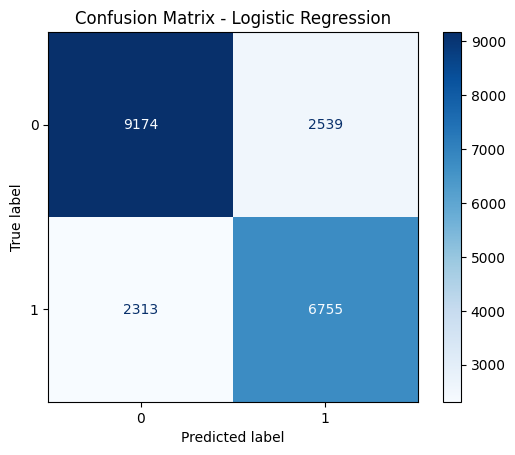

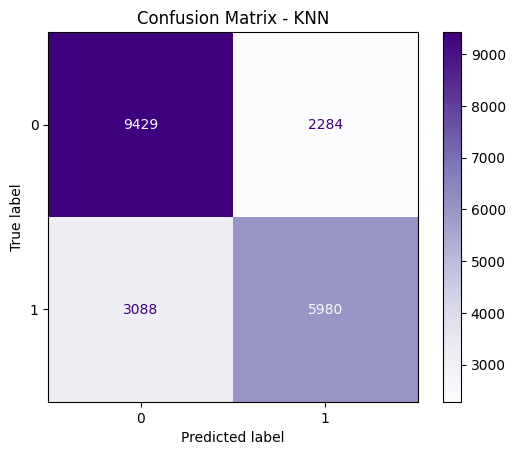

In [ ]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_classifier.classes_)
disp_knn.plot(cmap='Purples')
plt.title("Confusion Matrix - KNN")
plt.show()

### **EDA and Data Visualization**

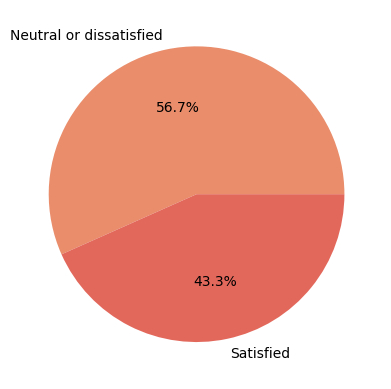

In [ ]:
# Pie chart to visualize the percentage of statisfied and neutral_or_disatisfied category
plt.pie(train['satisfaction'].value_counts(),
        labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("flare"),
        autopct = '%1.1f%%')
plt.show()

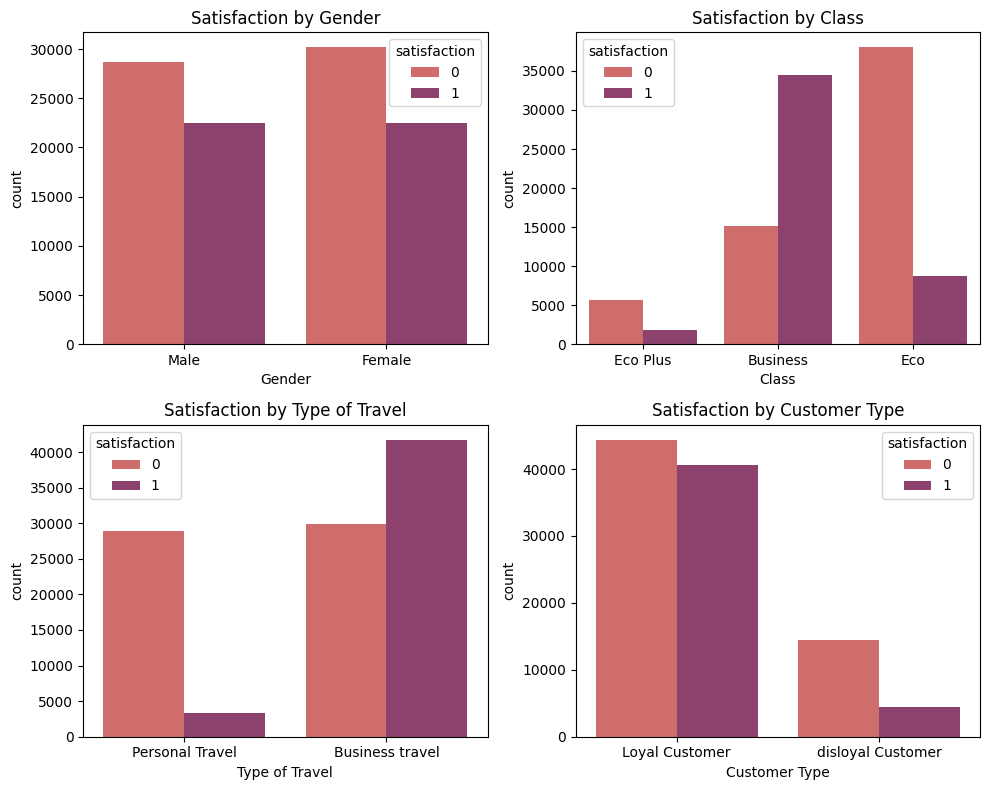

In [ ]:
# Bar chart of Categorical Variables vs Satisfaction
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.countplot(x='Gender', hue='satisfaction', palette='flare', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Satisfaction by Gender')

sns.countplot(x='Class', hue='satisfaction', palette='flare', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Satisfaction by Class')

sns.countplot(x='Type of Travel', hue='satisfaction', palette='flare', data=train, ax=ax[1, 0])
ax[1, 0].set_title('Satisfaction by Type of Travel')

sns.countplot(x='Customer Type', hue='satisfaction', palette='flare', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Satisfaction by Customer Type')

plt.tight_layout()
plt.show()

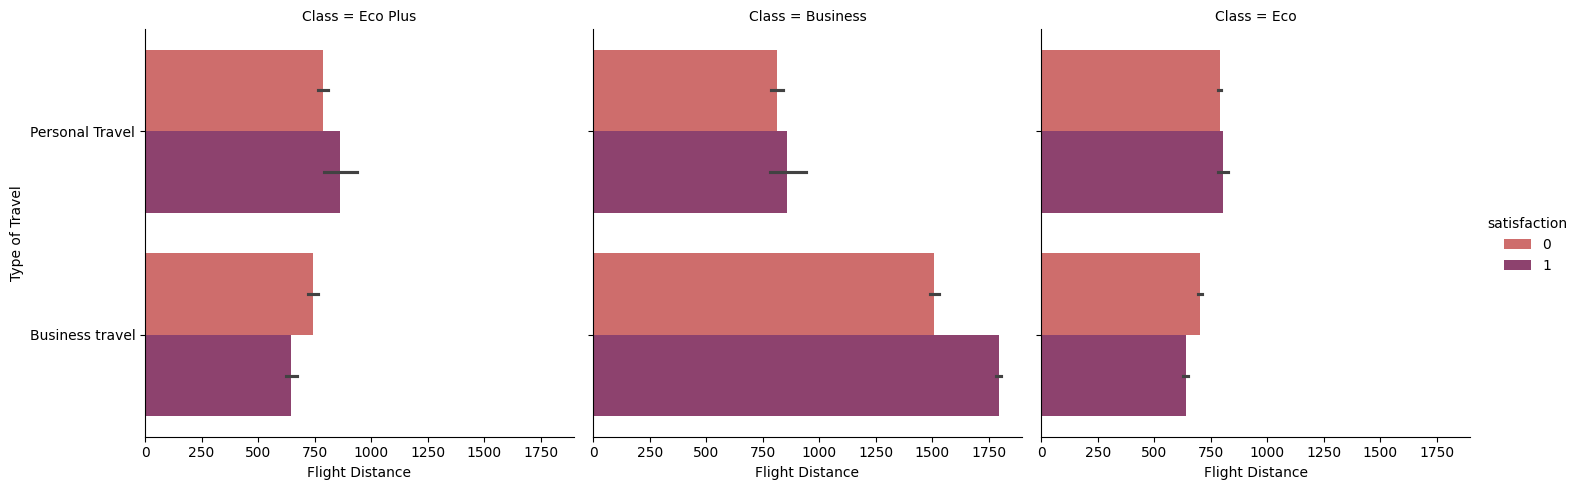

In [ ]:
# Bar chart of Class,Type of Travel,Flight Distance
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = "Flight Distance", y = "Type of Travel", col = "Class", hue = "satisfaction", data = train, kind = "bar", palette = "flare")

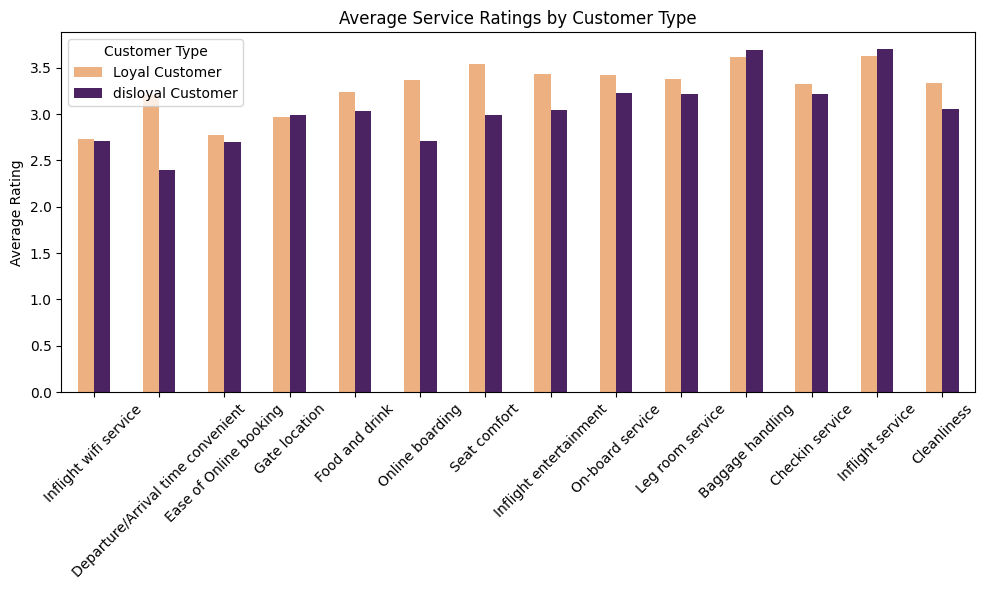

In [ ]:
# Bar chart for average rating by customer type
service_features = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

avg_ratings = train.groupby(['Customer Type'])[
    service_features].mean().T

avg_ratings.plot(kind='bar', figsize=(10,6), colormap='flare')
plt.title("Average Service Ratings by Customer Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

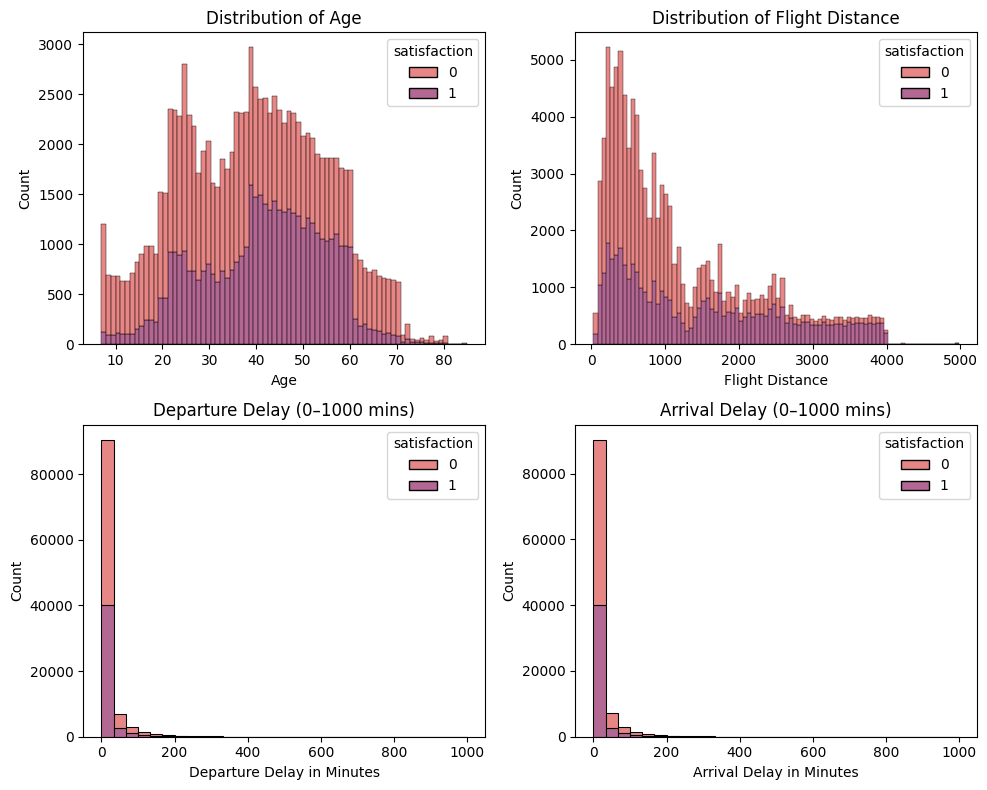

In [ ]:
# Histogram to visualization the distribution of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(x='Age', hue='satisfaction', multiple='stack', palette='flare', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

sns.histplot(x='Flight Distance', hue='satisfaction', multiple='stack', palette='flare', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Flight Distance')

sns.histplot(x='Departure Delay in Minutes', hue='satisfaction', palette='flare', data=train, multiple='stack', binrange=(0, 1000), bins=30, ax=ax[1, 0])
ax[1, 0].set_title('Departure Delay (0–1000 mins)')

sns.histplot(x='Arrival Delay in Minutes', hue='satisfaction', palette='flare', data=train, multiple='stack', binrange=(0, 1000), bins=30, ax=ax[1, 1])
ax[1, 1].set_title('Arrival Delay (0–1000 mins)')

plt.tight_layout()
plt.show()

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

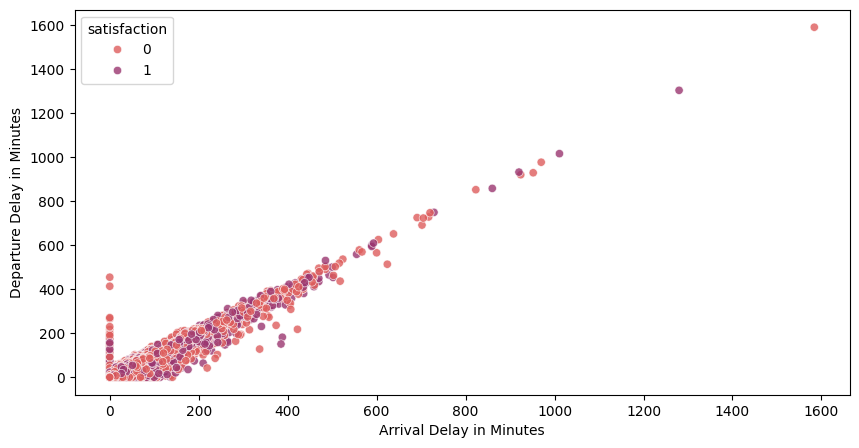

In [ ]:
# Scatter plot for Departure Delay and Arrival Delay (in minutes) vs Satisfaction
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='flare', alpha=0.8)

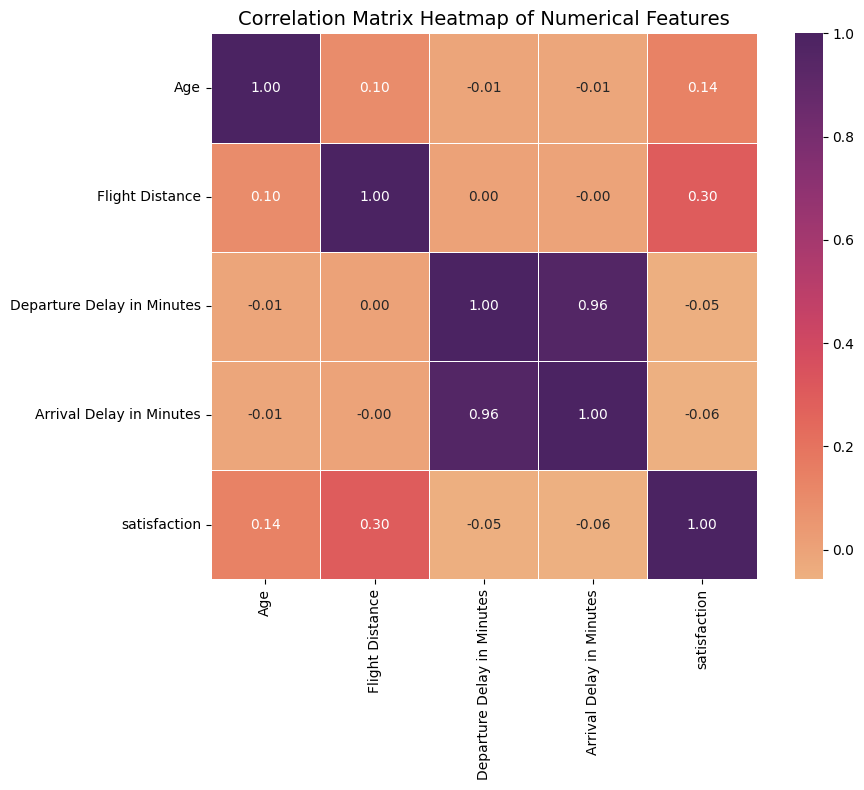

In [ ]:
# Correlation Heatmap for numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = train[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']].corr()

# Set up fig
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='flare', square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=14)

plt.tight_layout()
plt.show()

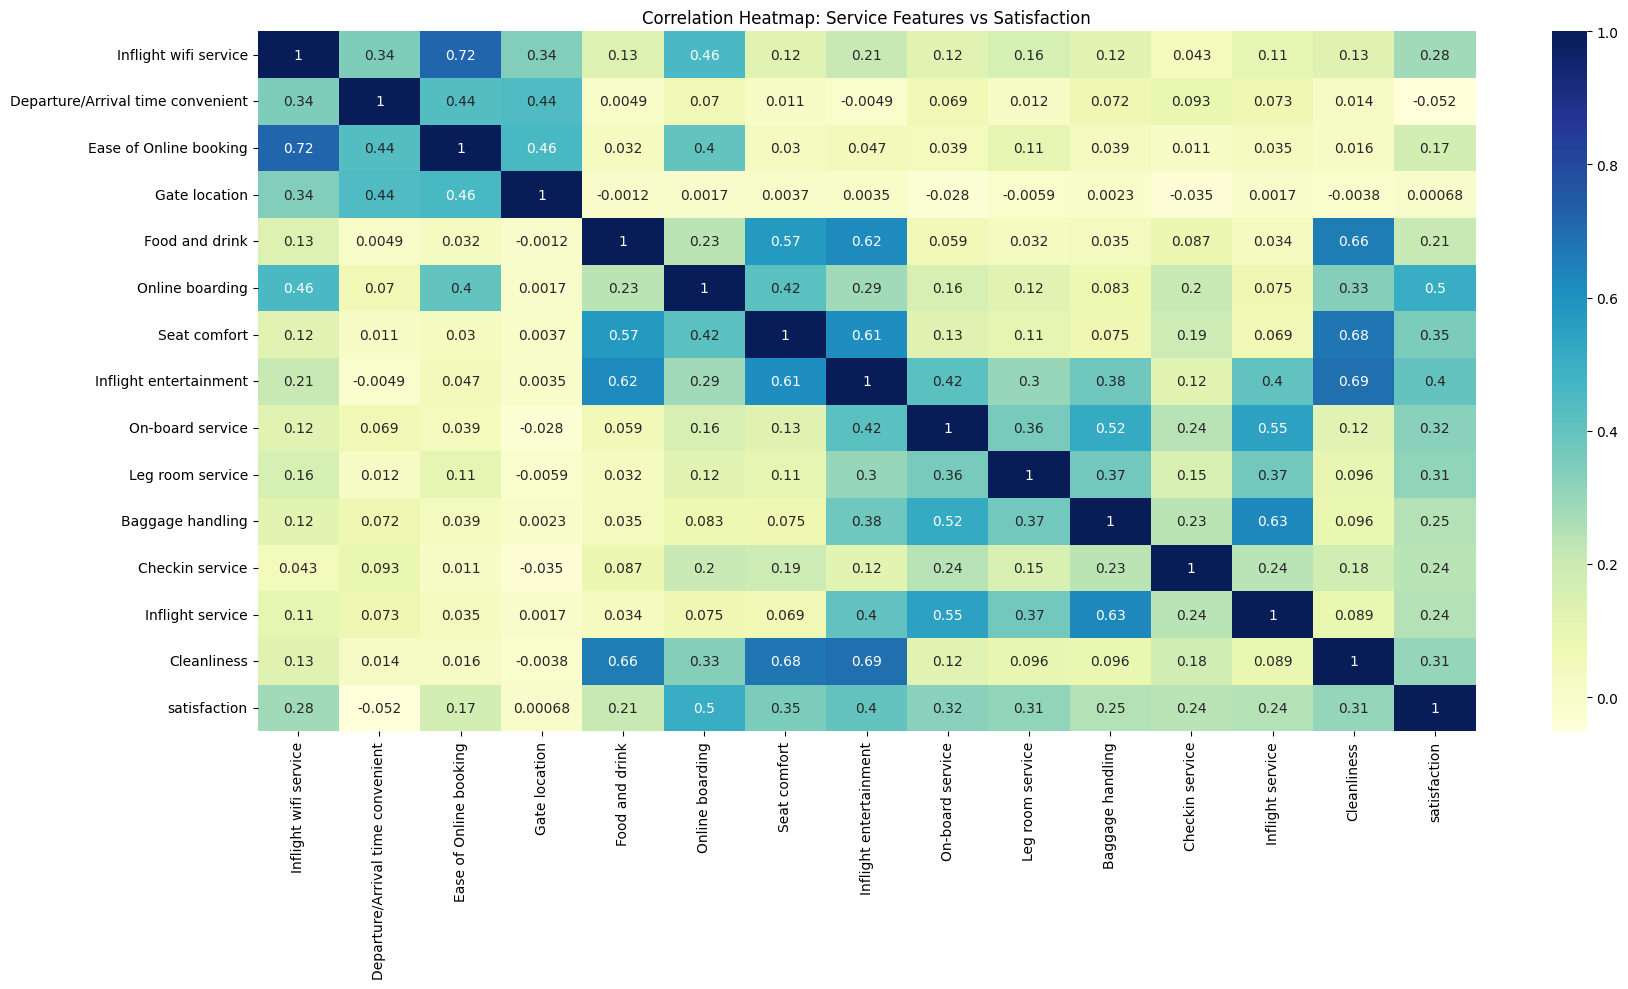

In [ ]:
# Heatmap of Service Correlation with Satisfaction

service_corr = train[service_features + ['satisfaction']].corr()

# Set up fig
plt.figure(figsize=(18,10))

# Create the heatmap
sns.heatmap(service_corr, annot=True, cmap='YlGnBu')

# Add the title
plt.title("Correlation Heatmap: Service Features vs Satisfaction")

plt.tight_layout()
plt.show()

### **Train & Test Data Preprocessing**

In [ ]:
# Handle outliers in Train Dataset

columns = ['Age','Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']
for col in columns:
  Q1 = train[col].quantile(0.25)
  Q3 = train[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR

  # Train dataset
  train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])
  train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])

In [ ]:
# Handle outliers in Test Dataset

columns = ['Age','Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']
for col in columns:
  Q1 = test[col].quantile(0.25)
  Q3 = test[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR

  # Test dataset
  test[col] = np.where(test[col] > upper_bound, upper_bound, test[col])
  test[col] = np.where(test[col] < lower_bound, lower_bound, test[col])

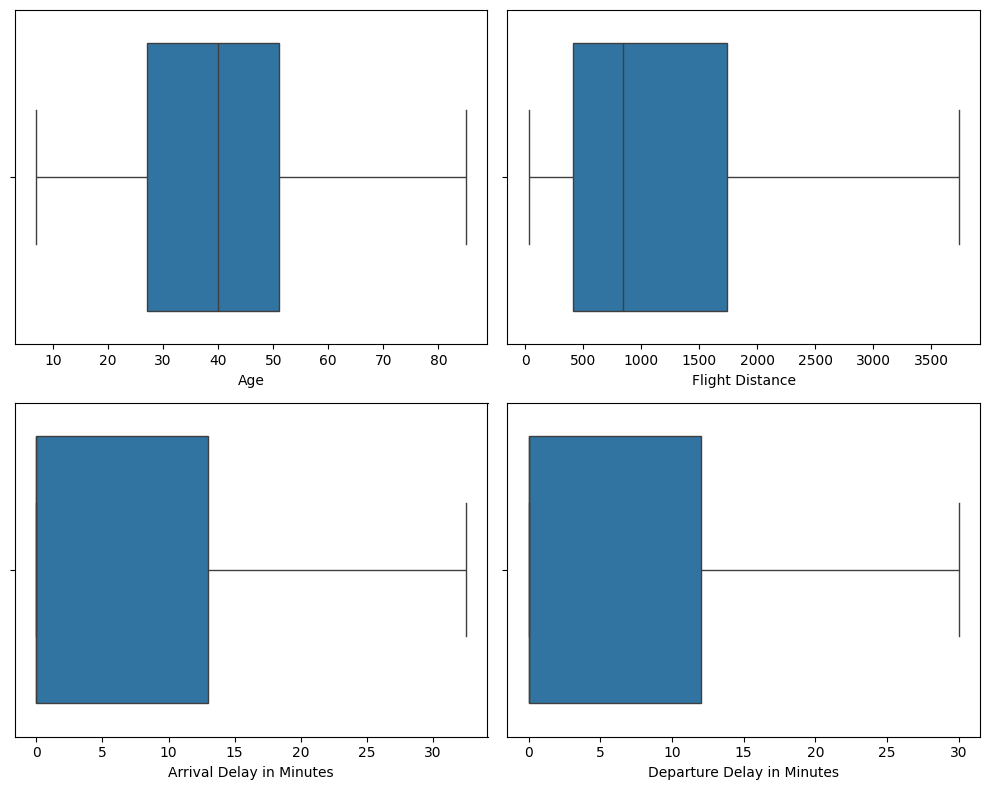

In [ ]:
# Create Box-Plot to visualize after handling outliers in train dataset
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=train, x='Age', ax=ax[0,0])
sns.boxplot(data=train, x='Flight Distance', ax=ax[0,1])
sns.boxplot(data=train, x='Arrival Delay in Minutes', ax=ax[1,0])
sns.boxplot(data=train, x='Departure Delay in Minutes', ax=ax[1,1])

plt.tight_layout()
plt.show()

### **Feature Engineering and Preparation for Machine Learning**

In [ ]:
# Create new features in both train and test
train['Delay Difference'] = train['Arrival Delay in Minutes'] - train['Departure Delay in Minutes']
test['Delay Difference'] = test['Arrival Delay in Minutes'] - test['Departure Delay in Minutes']

# Get current column list and remove 'satisfaction' in train
cols = train.columns.tolist()
cols.remove('satisfaction')

# Reorder with new features + satisfaction at the end in train
new_order = cols + ['satisfaction']

# Apply new order
train = train[new_order]

In [ ]:
# Drop highly correlated features to avoid multi-collinearity (Inflight wifi service, Arrival Delay in Minutes)
train.drop(['Inflight wifi service', 'Arrival Delay in Minutes'], axis = 1, inplace = True)
test.drop(['Inflight wifi service', 'Arrival Delay in Minutes'], axis=1, inplace=True)

print(train.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Delay Difference', 'satisfaction'],
      dtype='object')


/tmp/ipython-input-34-825627034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Inflight wifi service', 'Arrival Delay in Minutes'], axis = 1, inplace = True)


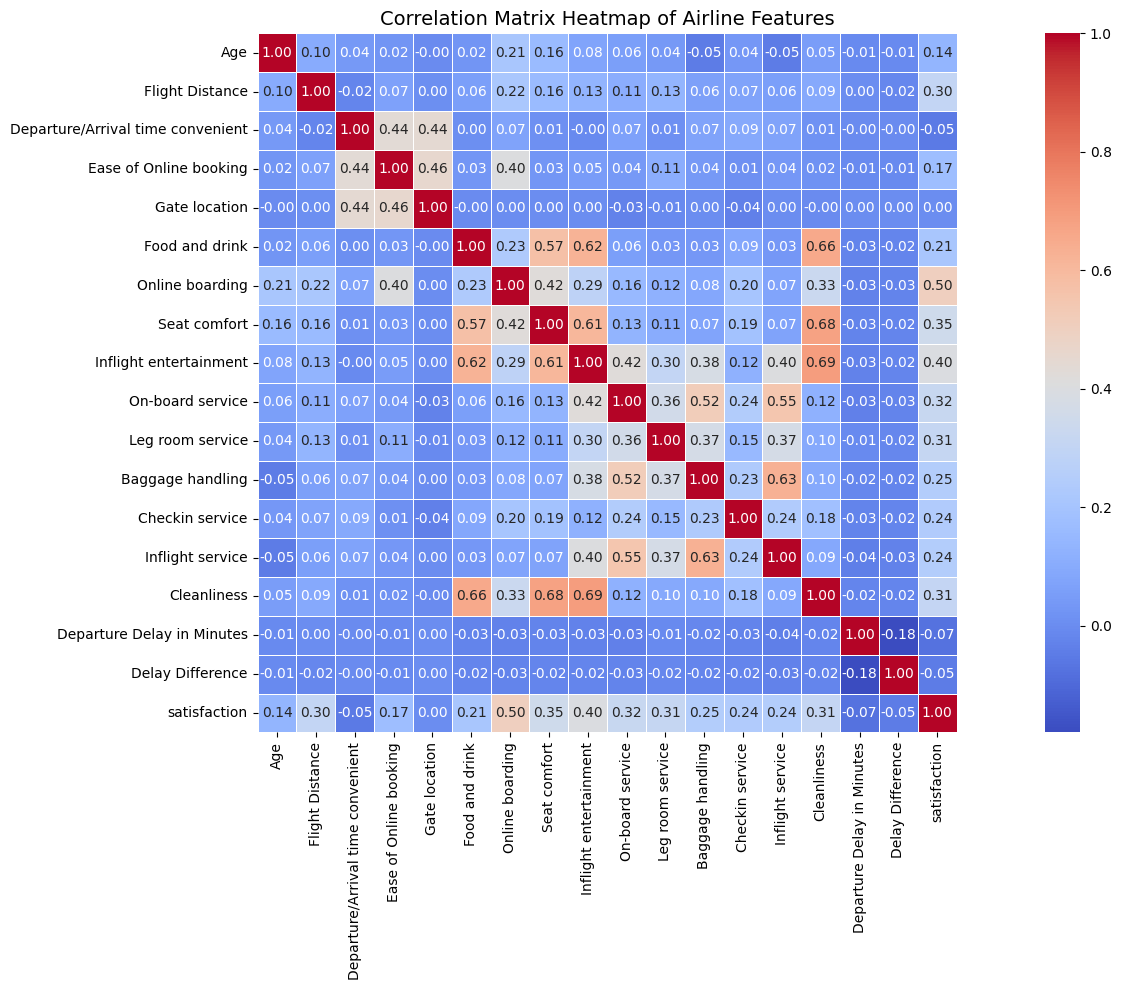

In [ ]:
# Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = train.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap of Airline Features', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Standardize numerical variables (StandardScaler)
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# List of features to scale
features_to_scale = train.drop(columns=['satisfaction']).select_dtypes(include='number').columns.tolist()

# Applying StandardScaler to the selected features in train
scaled_features = scaler.fit_transform(train[features_to_scale])

# Applying StandardScaler to the selected features in test
scaled_features_test = scaler.transform(test[features_to_scale])

# Create a DataFrame from the scaled features
scaled_columns = [f'Scaled {col}' for col in features_to_scale]
scaled_features_train = pd.DataFrame(scaled_features, columns=scaled_columns, index=train.index)
scaled_features_test_df = pd.DataFrame(scaled_features_test, columns=scaled_columns, index=test.index)

# Concatenate the scaled features with the original dataframe
train = pd.concat([train, scaled_features_train], axis=1)
test = pd.concat([test, scaled_features_test_df], axis=1)

# Display the first few rows
pd.set_option('display.max_columns', None)
print("Train sample:")
print(train.head())

print("\nTest sample:")
print(test.head())

Train sample:
   Gender      Customer Type   Age   Type of Travel     Class  \
0    Male     Loyal Customer  13.0  Personal Travel  Eco Plus   
1    Male  disloyal Customer  25.0  Business travel  Business   
2  Female     Loyal Customer  26.0  Business travel  Business   
3  Female     Loyal Customer  25.0  Business travel  Business   
4    Male     Loyal Customer  61.0  Business travel  Business   

   Flight Distance  Departure/Arrival time convenient  Ease of Online booking  \
0            460.0                                  4                       3   
1            235.0                                  2                       3   
2           1142.0                                  2                       2   
3            562.0                                  5                       5   
4            214.0                                  3                       3   

   Gate location  Food and drink  Online boarding  Seat comfort  \
0              1               5         

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize encoder
one_hot_encoder = OneHotEncoder()

# Fit-transform on train set
encoded_array = one_hot_encoder.fit_transform(train[categorical_cols]).toarray()

# Transform test set
encoded_test_array = one_hot_encoder.transform(test[categorical_cols]).toarray()

# Create a DataFrame from the dense array
encoded_df = pd.DataFrame(encoded_array,
                          columns=one_hot_encoder.get_feature_names_out(categorical_cols),
                          index=train.index)

# Create DataFrame from encoded test array
encoded_test_df = pd.DataFrame(encoded_test_array,
                               columns=one_hot_encoder.get_feature_names_out(categorical_cols),
                               index=test.index)

# Drop original categorical columns and add encoded columns in train
train_encoded = train.drop(columns=categorical_cols)
train_encoded = pd.concat([train_encoded, encoded_df], axis=1)

# Drop original categorical columns and add encoded columns in test
test_encoded = test.drop(columns=categorical_cols)
test_encoded = pd.concat([test_encoded, encoded_test_df], axis=1)

print(train_encoded.head())
print(test_encoded.head())

    Age  Flight Distance  Departure/Arrival time convenient  \
0  13.0            460.0                                  4   
1  25.0            235.0                                  2   
2  26.0           1142.0                                  2   
3  25.0            562.0                                  5   
4  61.0            214.0                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   


In [ ]:
# Retrain KNN and Logistic Regression with Hyperparameters Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Scaled numerical features and encoded categorical features
scaled_cols = [col for col in train_encoded.columns if col.startswith('Scaled ')]
categorical_encoded_cols = one_hot_encoder.get_feature_names_out(categorical_cols).tolist()

# Final features and target in train
X = train_encoded[scaled_cols + categorical_encoded_cols]
y = train_encoded['satisfaction']

# Final features and target in test
X_test_1 = test_encoded[scaled_cols + categorical_encoded_cols]
y_test_1 = test_encoded['satisfaction']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Hyperparameter Grids
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [200]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean
}

# Initialize Models
lr = LogisticRegression()
knn = KNeighborsClassifier()

# Grid Search
lr_grid = GridSearchCV(lr, lr_params, cv=3, n_jobs=-1, verbose=1)
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, verbose=1)

# Fit Models
lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

# Best Models and Predictions
lr_best = lr_grid.best_estimator_
knn_best = knn_grid.best_estimator_

y_pred_lr = lr_best.predict(X_test)
y_pred_knn = knn_best.predict(X_test)

# Predict on external test set
y_test_pred_lr = lr_best.predict(X_test_1)
y_test_pred_knn = knn_best.predict(X_test_1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
# Evaluation for train split
print("Best Logistic Regression Hyperparameters:", lr_grid.best_params_)
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Best KNN Hyperparameters:", knn_grid.best_params_)
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

Best Logistic Regression Hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11713
           1       0.87      0.83      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781

Best KNN Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Classification Report - KNN
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11713
           1       0.93      0.87      0.90      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.91      0.91     20781
weighted avg       0.92      0.92      0.92     20781



In [ ]:
# Evaluation for external test
print("\nClassification Report - Logistic Regression (External Test Set)")
print(classification_report(y_test_1, y_test_pred_lr))

print("Classification Report - KNN (External Test Set)")
print(classification_report(y_test_1, y_test_pred_knn))


Classification Report - Logistic Regression (External Test Set)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14573
           1       0.87      0.82      0.84     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976

Classification Report - KNN (External Test Set)
              precision    recall  f1-score   support

           0       0.91      0.95      0.92     14573
           1       0.93      0.87      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.92      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



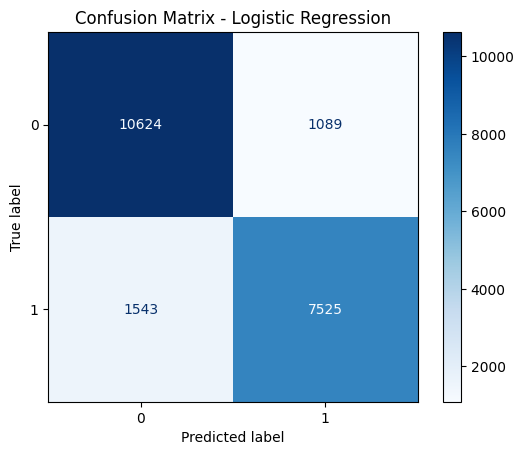

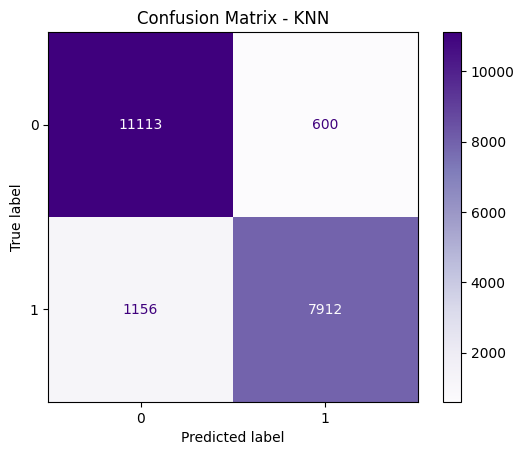

In [ ]:
# Confusion Matrix for Logistic Regression in train split
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_best.classes_)
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for KNN in train split
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_best.classes_)
disp_knn.plot(cmap='Purples')
plt.title("Confusion Matrix - KNN")
plt.show()

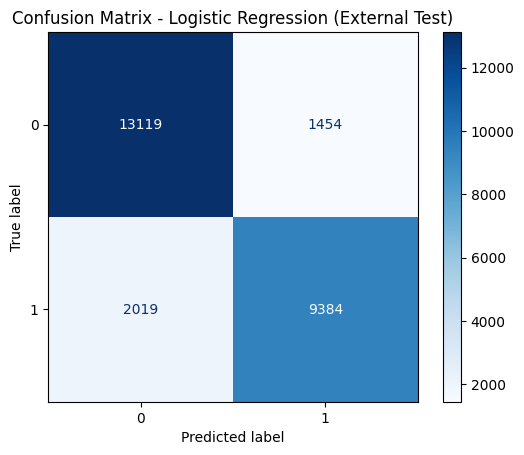

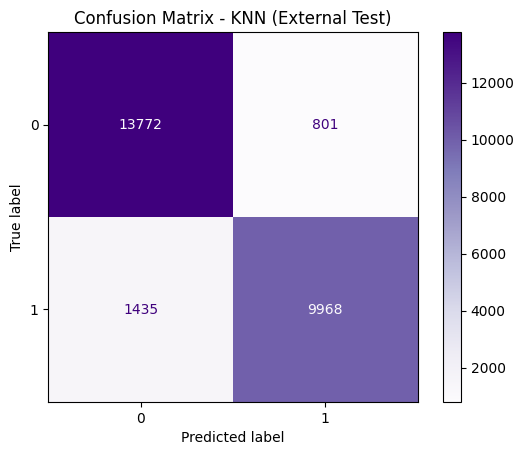

In [ ]:
# Confusion Matrices for Logistric Regression External Test
cm_lr_test = confusion_matrix(y_test_1, y_test_pred_lr)
disp_lr_test = ConfusionMatrixDisplay(confusion_matrix=cm_lr_test, display_labels=lr_best.classes_)
disp_lr_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (External Test)")
plt.show()

# Confusion Matrices for KNN External Test
cm_knn_test = confusion_matrix(y_test_1, y_test_pred_knn)
disp_knn_test = ConfusionMatrixDisplay(confusion_matrix=cm_knn_test, display_labels=knn_best.classes_)
disp_knn_test.plot(cmap='Purples')
plt.title("Confusion Matrix - KNN (External Test)")
plt.show()

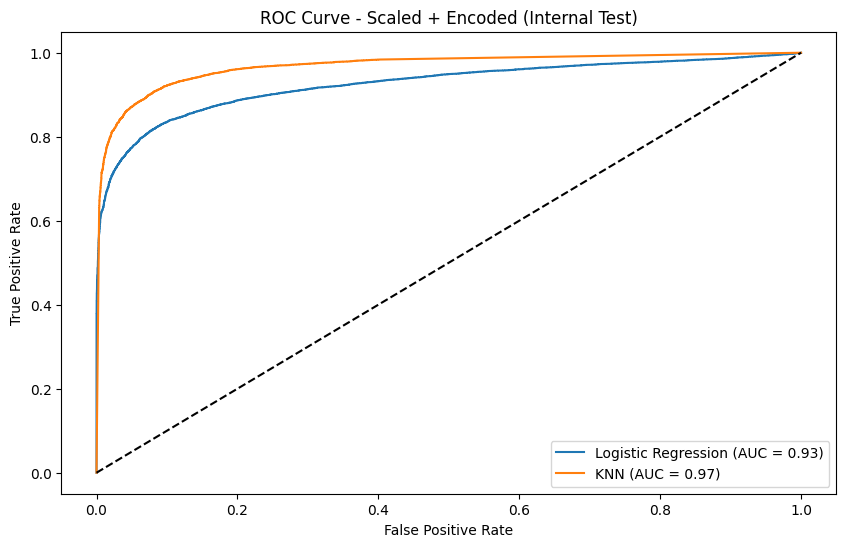

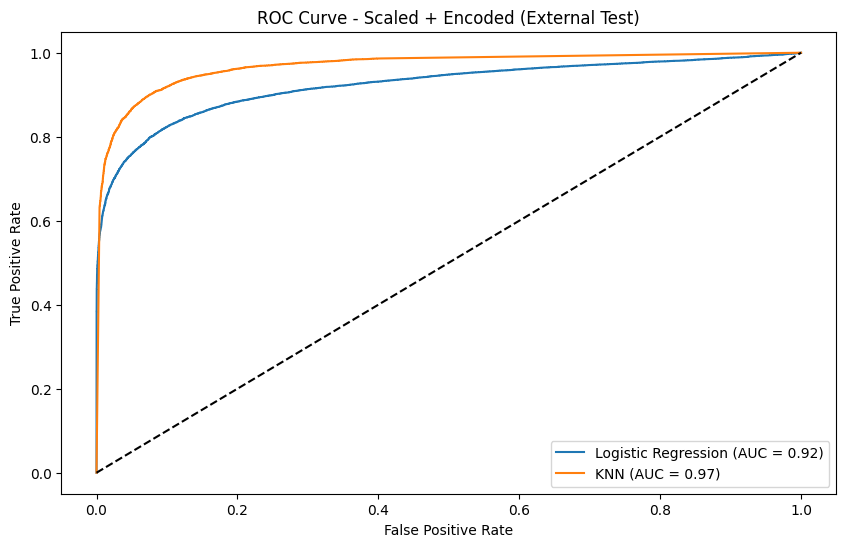

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use these test sets
X_test_lr_knn = X_test
X_test_external_lr_knn = X_test_1

# ROC on internal test split
plt.figure(figsize=(10, 6))
for model, name in [(lr_best, "Logistic Regression"), (knn_best, "KNN")]:
    y_score = model.predict_proba(X_test_lr_knn)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Scaled + Encoded (Internal Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ROC on external test set
plt.figure(figsize=(10, 6))
for model, name in [(lr_best, "Logistic Regression"), (knn_best, "KNN")]:
    y_score = model.predict_proba(X_test_external_lr_knn)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_1, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Scaled + Encoded (External Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **Advanced Classification Model**

In [ ]:
# Choose another 2 models (Random Forest, XGBoost) with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Rating Features
rating_features = [
    'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Original and Encoded Categorical columns
original_num_cols = rating_features + ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Delay Difference']
categorical_encoded_cols = one_hot_encoder.get_feature_names_out(categorical_cols).tolist()

# Final features and target (train split)
X = train_encoded[original_num_cols + categorical_encoded_cols]
y = train_encoded['satisfaction']

# Final features and target (external test)
X_test_1 = test_encoded[original_num_cols + categorical_encoded_cols]
y_test_1 = test_encoded['satisfaction']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Hyperparameter Grids
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Initialize Models
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Grid Search
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=3, n_jobs=-1, verbose=1)
xgb_grid = GridSearchCV(xgb_classifier, xgb_params, cv=3, n_jobs=-1, verbose=1)

# Fit Models
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Best Models and Predictions
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# Predict on external test set
y_test_pred_rf = rf_best.predict(X_test_1)
y_test_pred_xgb = xgb_best.predict(X_test_1)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
# Evaluation Train Split
print("Best XGBoost Hyperparameters:", xgb_grid.best_params_)
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

print("Best Random Forest Hyperparameters:", rf_grid.best_params_)
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

Best Random Forest Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94

In [ ]:
# Evaluate on external test set
print("Classification Report - XGBoost (External Test Set)")
print(classification_report(y_test_1, y_test_pred_xgb))

print("Classification Report - Random Forest (External Test Set)")
print(classification_report(y_test_1, y_test_pred_rf))

Classification Report - XGBoost (External Test Set)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Classification Report - Random Forest (External Test Set)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



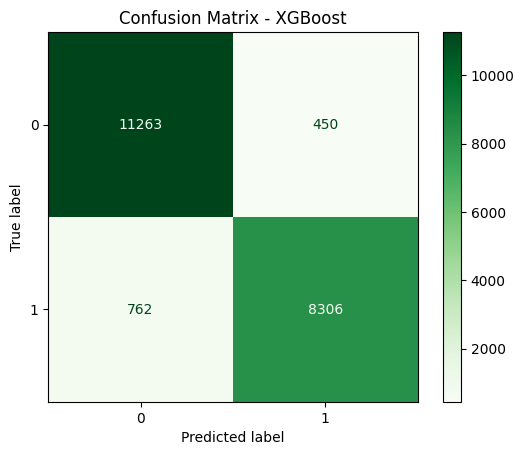

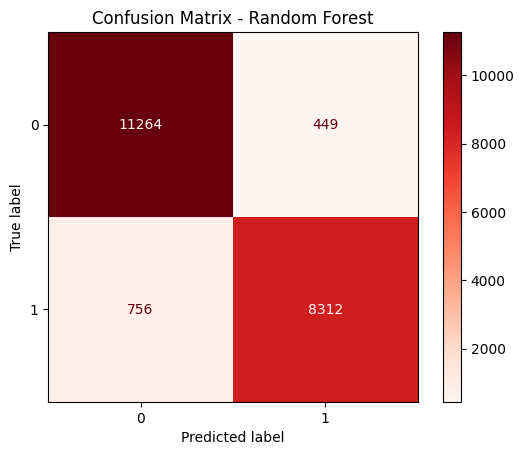

In [ ]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_best.classes_)
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_best.classes_)
disp_rf.plot(cmap='Reds')
plt.title("Confusion Matrix - Random Forest")
plt.show()

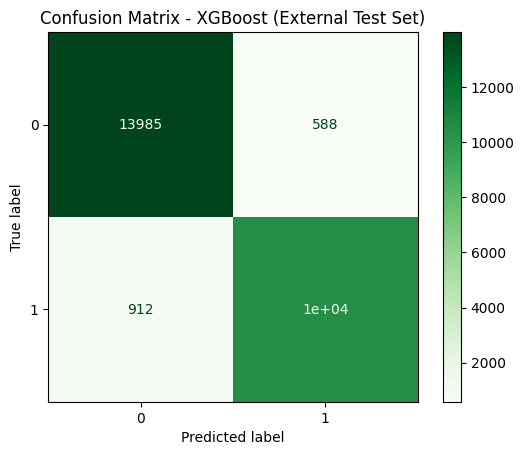

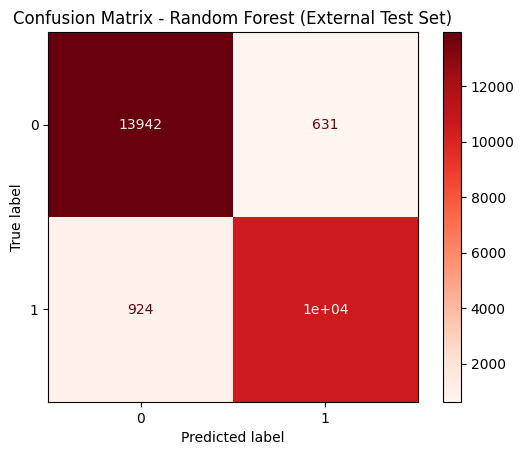

In [ ]:
# Confusion Matrix for XGBoost (external test)
cm_xgb_test = confusion_matrix(y_test_1, y_test_pred_xgb)
disp_xgb_test = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_test, display_labels=xgb_best.classes_)
disp_xgb_test.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost (External Test Set)")
plt.show()

# Confusion Matrix for Random Forest (external test)
cm_rf_test = confusion_matrix(y_test_1, y_test_pred_rf)
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test, display_labels=rf_best.classes_)
disp_rf_test.plot(cmap='Reds')
plt.title("Confusion Matrix - Random Forest (External Test Set)")
plt.show()

In [ ]:
# Feature importance from best XGBoost
importances_xgb = xgb_best.feature_importances_

# Create a DataFrame
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb}).sort_values(by='Importance', ascending=False)

# Feature importance from best RandomForest
importances_rf = rf_best.feature_importances_

# Create a DataFrame
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-50-2978653143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance_df,


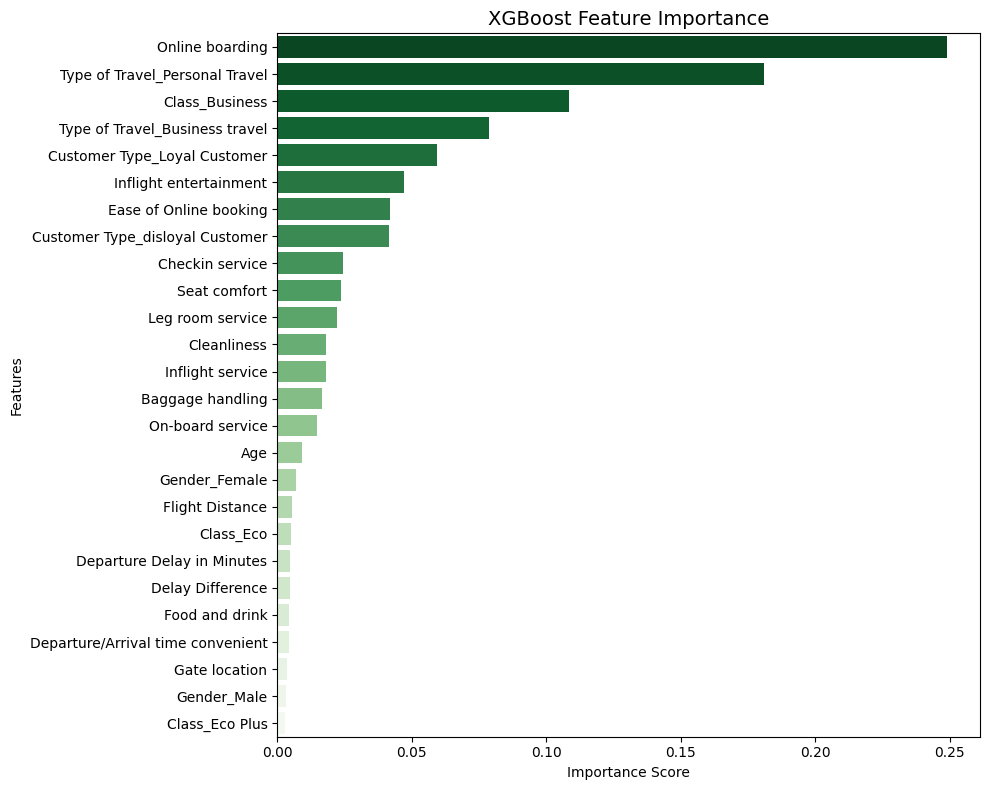

In [ ]:
# Bar chart of feature importance for XGBoost
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

# Plot horizontal bar chart
sns.barplot(data=xgb_importance_df,
            y='Feature',
            x='Importance',
            palette='Greens_r')

# Add labels and title
plt.title('XGBoost Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

/tmp/ipython-input-51-1219512201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df,


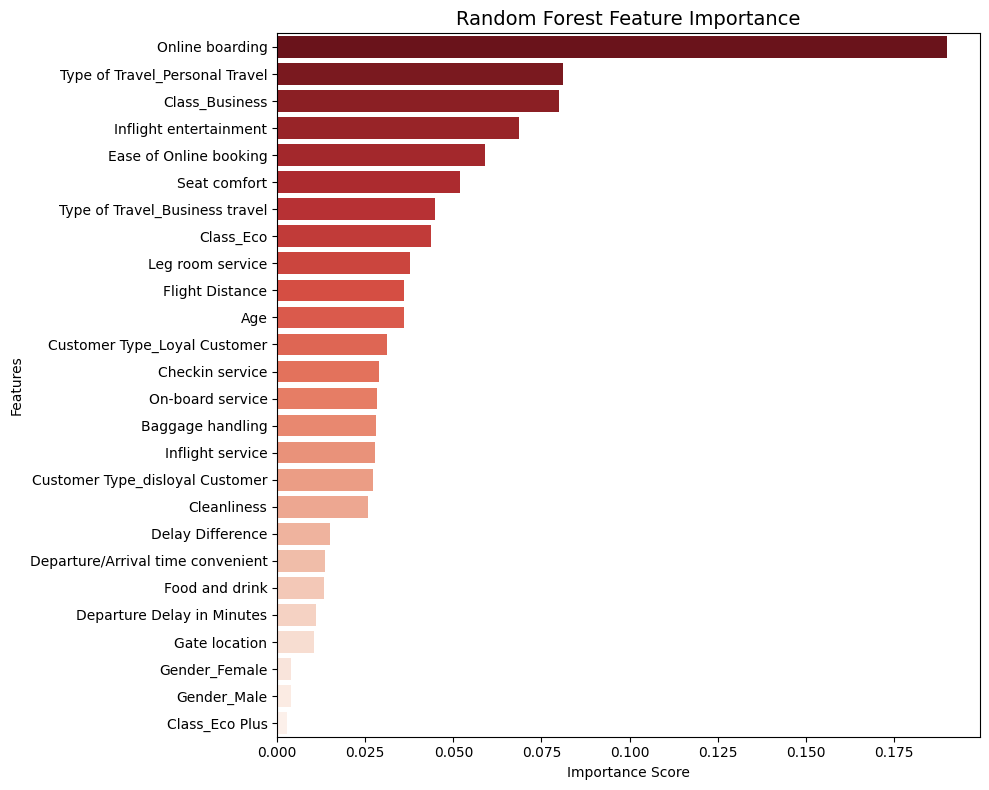

In [ ]:
# Bar chart of feature importance for Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

# Plot horizontal bar chart
sns.barplot(data=rf_importance_df,
            y='Feature',
            x='Importance',
            palette='Reds_r')

# Add labels and title
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

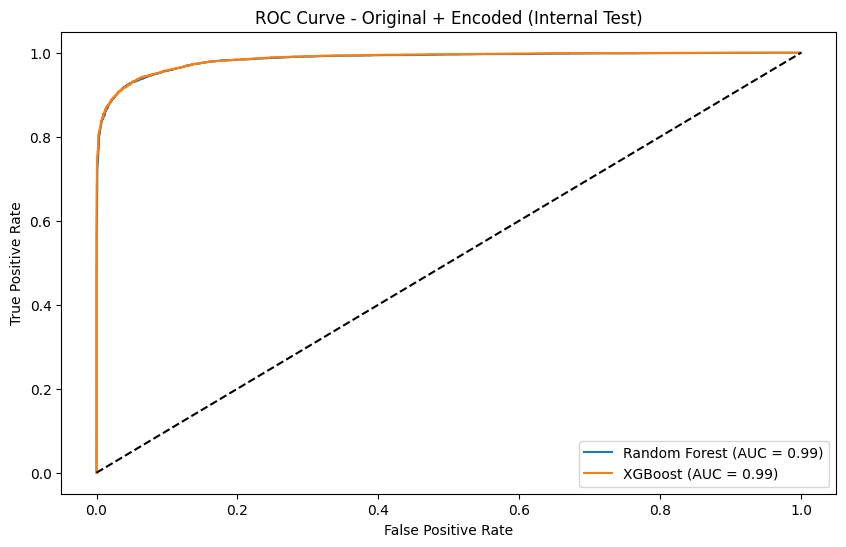

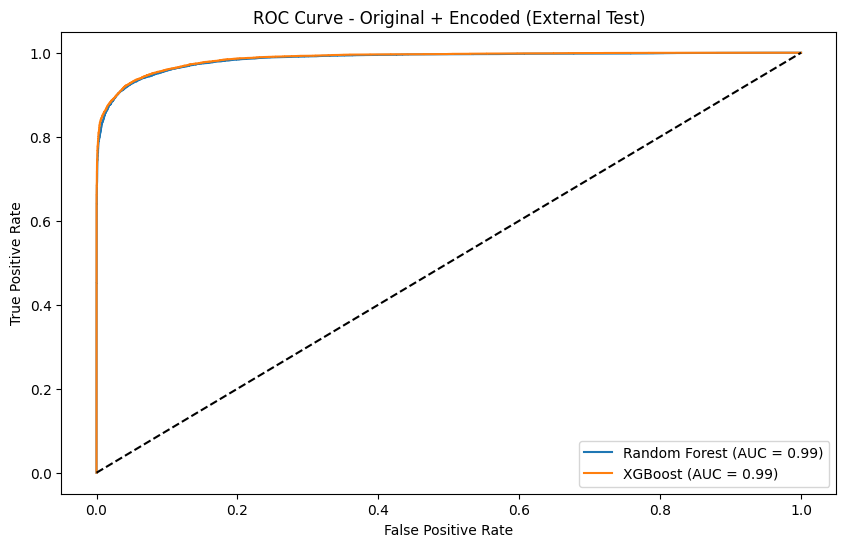

In [ ]:
from sklearn.metrics import roc_curve, auc

X_test_rf_xgb = X_test
X_test_external_rf_xgb = X_test_1

# ROC on internal test split
plt.figure(figsize=(10, 6))
for model, name in [(rf_best, "Random Forest"), (xgb_best, "XGBoost")]:
    y_score = model.predict_proba(X_test_rf_xgb)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Original + Encoded (Internal Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ROC on external test set
plt.figure(figsize=(10, 6))
for model, name in [(rf_best, "Random Forest"), (xgb_best, "XGBoost")]:
    y_score = model.predict_proba(X_test_external_rf_xgb)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_1, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Original + Encoded (External Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()